# Matt and Paul's Notebook

## 1. Packages and Libraries Import

In [166]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score,precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

## 1b. Test on Iris Dataset (to be deleted)

In [176]:
# Load Iris Data to test functions
df= pd.read_csv('data/games2018.csv')
df=df.drop(['Unnamed: 0','1TeamID','2TeamID','1Opp_TeamID','2Opp_TeamID'],axis=1)
for i in df.columns:
    print(i)

1Score
1FGM
1FGA
1FGM3
1FGA3
1FTM
1FTA
1OR
1DR
1Ast
1TO
1Stl
1Blk
1PF
1Opp_Score
1Opp_FGM
1Opp_FGA
1Opp_FGM3
1Opp_FGA3
1Opp_FTM
1Opp_FTA
1Opp_OR
1Opp_DR
1Opp_Ast
1Opp_TO
1Opp_Stl
1Opp_Blk
1Opp_PF
1possessions
1eFG
1TSpct
1FTR
13PR
1ORpct
1DRpct
1REBpct
1TR
1ATOr
1Ast_pct
1Stl_pct
1Blk_pct
1TO_ratio
1Opp_possessions
1Opp_eFG
1Opp_TSpct
1Opp_FTR
1Opp_3PR
1Opp_ORpct
1Opp_DRpct
1Opp_REBpct
1Opp_TR
1Opp_ATOr
1Opp_Ast_pct
1Opp_Stl_pct
1Opp_Blk_pct
1Opp_TO_ratio
2Score
2FGM
2FGA
2FGM3
2FGA3
2FTM
2FTA
2OR
2DR
2Ast
2TO
2Stl
2Blk
2PF
2Opp_Score
2Opp_FGM
2Opp_FGA
2Opp_FGM3
2Opp_FGA3
2Opp_FTM
2Opp_FTA
2Opp_OR
2Opp_DR
2Opp_Ast
2Opp_TO
2Opp_Stl
2Opp_Blk
2Opp_PF
2possessions
2eFG
2TSpct
2FTR
23PR
2ORpct
2DRpct
2REBpct
2TR
2ATOr
2Ast_pct
2Stl_pct
2Blk_pct
2TO_ratio
2Opp_possessions
2Opp_eFG
2Opp_TSpct
2Opp_FTR
2Opp_3PR
2Opp_ORpct
2Opp_DRpct
2Opp_REBpct
2Opp_TR
2Opp_ATOr
2Opp_Ast_pct
2Opp_Stl_pct
2Opp_Blk_pct
2Opp_TO_ratio
FavWin


In [177]:
# Petal length and width features

X = df.drop('FavWin',axis=1)
y = df['FavWin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4210, 112), (1053, 112))

In [178]:
y.value_counts(normalize=True)

True     0.741972
False    0.258028
Name: FavWin, dtype: float64

## 2. Function Builds for Project

### 2a. Data Scaling

In [179]:
ss = StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [180]:
len(X_test_scaled)

1053

In [181]:
log_new=LogisticRegression()
selector = RFECV(log_new, min_features_to_select=10, step=1)
selector.fit(X_train_scaled,y_train)
selector.ranking_

array([36, 11, 81, 83,  1, 38,  1, 46,  1,  1,  1, 20, 66, 80, 61,  1, 58,
       77,  1, 68, 69,  1,  1, 51, 57, 26, 32, 18,  1, 37, 10,  1,  1, 44,
        1, 24, 45,  1, 50, 19, 67,  1, 60, 59,  1, 71,  1,  1, 25, 43, 56,
       65, 52, 27, 33, 82, 64, 17, 76, 78, 21, 14, 23,  2,  6, 13,  1, 75,
        1, 72, 55, 70, 62,  9,  1, 42, 84, 40,  1,  8,  5,  1, 35, 15,  3,
       22, 47, 73, 53,  7, 54, 29, 31, 12, 16, 74,  1,  1, 63, 48,  1, 49,
        1, 30,  1, 28, 39, 79, 41,  1, 34,  4])

In [182]:
new_dict=dict(zip(X_train.columns,selector.ranking_))
new_dict=dict(sorted(new_dict.items(), key=lambda item: item[1]))
pred_list=list(new_dict.keys())
best_pred=pred_list[:20]

In [183]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_best_log=X_train_scaled[best_pred]

In [184]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_best_log=X_test_scaled[best_pred]

In [185]:
len(X_test_best_log)

1053

In [186]:
y_train=y_train.reset_index(drop=True)
y_train

0        True
1        True
2        True
3       False
4       False
        ...  
4205     True
4206     True
4207     True
4208    False
4209     True
Name: FavWin, Length: 4210, dtype: bool

### 2b. Logistic Regression Model

In [190]:
log_reg_sum = sm.Logit(y_train, X_train_best_log).fit()
print(log_reg_sum.summary())

Optimization terminated successfully.
         Current function value: 0.663680
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                 FavWin   No. Observations:                 4210
Model:                          Logit   Df Residuals:                     4191
Method:                           MLE   Df Model:                           18
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 -0.1666
Time:                        18:38:32   Log-Likelihood:                -2794.1
converged:                       True   LL-Null:                       -2395.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
1FGA3           -1.0854      0.465     -2.336      0.019      -1.996      -0.175
1FTA             0.576

Create a function to use GridSearchCV, find the best hyperparameters and then create a model with those results and values. Also print some scoring metrics to assess how well the model performs.

In [188]:
def logreg(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'penalty': ['l1', 'l2' ,'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    
    # Instantiate & fit LogReg model for GridSearch
    grid_logreg = LogisticRegression(random_state=42)
    grid_logreg.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_logreg, param_grid=grid, cv=5,
                      scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    logreg_params = gs.best_params_
    
    # Use best penalty from best_params
    logreg_penalty = logreg_params['penalty']
    print(f'Penalty: {logreg_penalty}')
    
    # Use best solver from best_params
    logreg_solver = logreg_params['solver']
    print(f'Solver: {logreg_solver}')
    
    # Instantiate & fit LogReg model
    log = LogisticRegression(random_state=42, penalty=logreg_penalty, solver=logreg_solver)
    log.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = log.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(log, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = log.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = log.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
  
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(log, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(log, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(log, X_train, y_train)
    plot_confusion_matrix(log, X_test, y_test)

Penalty: l2
Solver: saga
Mean Cross-Val Score: 0.747980997624703
Train Mean Accuracy: 0.7475059382422803
Test Mean Accuracy: 0.7388414055080722
Recall Score: 0.9780077619663649
Precision Score: 0.7455621301775148
F1 Score: 0.846110800223839


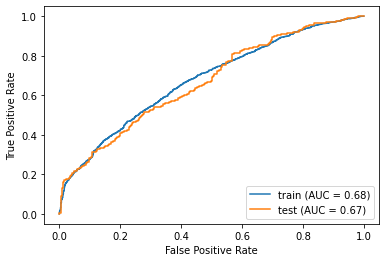

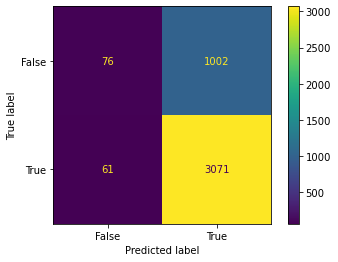

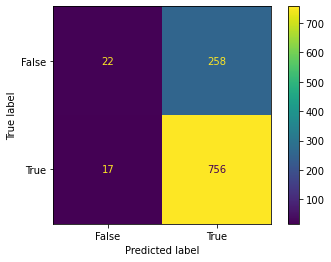

In [191]:
logreg(X_train_best_log,X_test_best_log,y_train,y_test)

### 2c. K-Nearest Neighbors Model

Create a function to use GridSearchCV, find the best hyperparameters and then create a model with those results and values. Also print some scoring metrics to assess how well the model performs.

In [62]:
def knn(X_train, X_test, y_train, y_test, metric='minkowski', cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']}
    
    # Instantiate & fit KNN model for GridSearch
    grid_knn = KNeighborsClassifier()
    grid_knn.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_knn, param_grid=grid, cv=5, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    knn_params = gs.best_params_
    
    # Use best # of neighbors from best_params
    knn_neighbors = knn_params['n_neighbors']
    print(f'Number of Neighbors: {knn_neighbors}')
    
    # Use best metric from best_params
    knn_metric = knn_params['metric']
    print(f'Metric: {knn_metric}')
    
    # Use best weights from best_params
    knn_weights=knn_params['weights']
    print(f'Weights: {knn_weights}')
    
    # Instantiate & fit K-Nearest Neighbors model
    knn = KNeighborsClassifier(n_neighbors=knn_neighbors, metric=knn_metric,
                               weights=knn_weights)
    knn.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = knn.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(knn, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = knn.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = knn.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(knn, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(knn, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(knn, X_train, y_train)
    plot_confusion_matrix(knn, X_test, y_test)

Number of Neighbors: 15
Metric: manhattan
Weights: distance
Mean Cross-Val Score: 0.7783847980997625
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.7739791073124407
Recall Score: 0.9754204398447607
Precision Score: 0.774922918807811
F1 score: 0.86368843069874


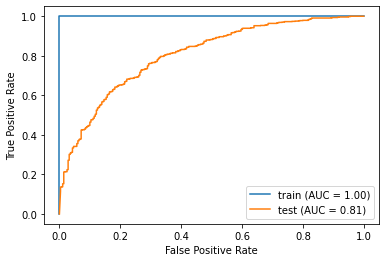

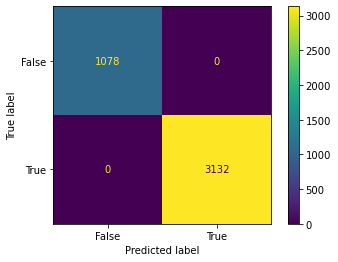

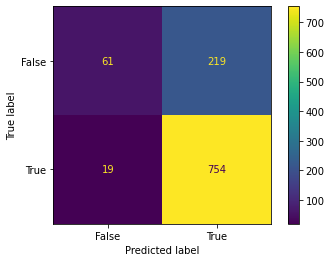

In [63]:
#Takes 6 minutes and 25 seconds to run
knn(X_train, X_test, y_train, y_test)

In [ ]:
# # GridSearchCV alternative coded by hand (not to be used)
# knn_dict={}
# for index in range(1,33,2):
#     knn_model = KNeighborsClassifier(n_neighbors=index)
#     knn_log_loss = -1 * cross_val_score(knn_model, X_train,
#                                         y_train, scoring="accuracy").mean()
#     knn_dict[index] = knn_log_loss
# min_knn = min(knn_dict.values())
# low_key = list(knn_dict.keys())[list(knn_dict.values()).index(min_knn)]
# knn = KNeighborsClassifier(n_neighbors=low_key,metric=metric)

### 2d. Decision Tree Model

In [ ]:
dtree_new=DecisionTreeClassifier()
selector2 = RFECV(dtree_new, min_features_to_select=10, step=1)
selector2.fit(X_train_scaled,y_train)
selector2.ranking_

In [ ]:
new_dict2=dict(zip(X_train.columns,selector.ranking_))
new_dict2=dict(sorted(new_dict.items(), key=lambda item: item[1]))
pred_list3=list(new_dict.keys())
best_pred2=pred_list[:33]

In [ ]:
X_train_best_dtree=X_train_scaled[best_pred2]
X_test_best_dtree=X_test_scaled[best_pred2]

In [214]:
best_pred2

['1FGA3',
 '1FTA',
 '1DR',
 '1Ast',
 '1TO',
 '1Opp_FGM',
 '1Opp_FGA3',
 '1Opp_OR',
 '1Opp_DR',
 '1possessions',
 '1FTR',
 '13PR',
 '1DRpct',
 '1ATOr',
 '1TO_ratio',
 '1Opp_TSpct',
 '1Opp_3PR',
 '1Opp_ORpct',
 '2TO',
 '2Blk',
 '2Opp_FGA3',
 '2Opp_DR',
 '2Opp_Stl',
 '2Blk_pct',
 '2TO_ratio',
 '2Opp_TSpct',
 '2Opp_3PR',
 '2Opp_DRpct',
 '2Opp_Stl_pct',
 '2OR',
 '2possessions',
 '2Opp_TO_ratio',
 '2Opp_TO']

Create a function to use GridSearchCV, find the best hyperparameters and then create a model with those results and values. Also print some scoring metrics to assess how well the model performs.

In [205]:
def dtree(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'max_depth': [3,10,15],
    'min_samples_split': [2,8,10,15],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Decision Tree model for GridSearch
    grid_dt = DecisionTreeClassifier()
    grid_dt.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_dt, param_grid=grid, cv=5, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    dt_params = gs.best_params_
    
    # Use best max depth from best_params
    dt_max_depth = dt_params['max_depth']
    print(f'Max Depth: {dt_max_depth}')
    
    # Use best minimum sample split from best_params
    dt_min_samp = dt_params['min_samples_split']
    print(f'Min Sample Split: {dt_min_samp}')
    
    # Use best criterion from best_params
    dt_criterion = dt_params['criterion']
    print(f'criterion: {dt_criterion}')
    
    # Instantiate & fit Decision Tree model
    dtree = DecisionTreeClassifier(max_depth=dt_max_depth, criterion=dt_criterion,
                                   min_samples_split=dt_min_samp, random_state=42)
    dtree.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = dtree.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(dtree, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = dtree.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = dtree.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(dtree, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(dtree, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(dtree, X_train, y_train)
    plot_confusion_matrix(dtree, X_test, y_test)

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.742042755344418
Train Mean Accuracy: 0.7458432304038005
Test Mean Accuracy: 0.7359924026590693
Recall Score: 1.0
Precision Score: 0.7354900095147479
F1 score: 0.8475877192982456


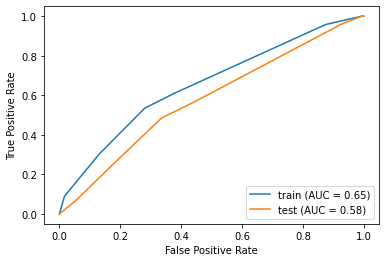

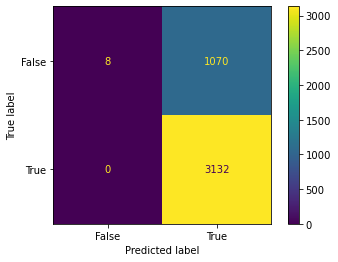

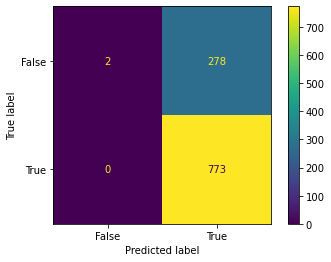

In [206]:
#Took 14 min to run
dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### 2e. Random Forest Model

Create a function to use GridSearchCV, find the best hyperparameters and then create a model with those results and values. Also print some scoring metrics to assess how well the model performs.

In [21]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=5, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);

Number of Trees: 106
criterion: gini
Mean Cross-Val Score: 0.7821852731591449
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.7815764482431149
Recall Score: 0.9702457956015524
Precision Score: 0.7836990595611285
F1 score: 0.8670520231213874


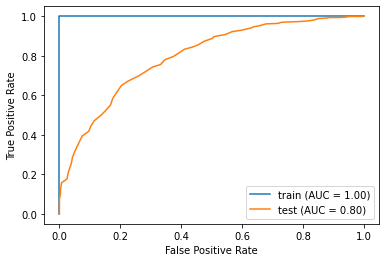

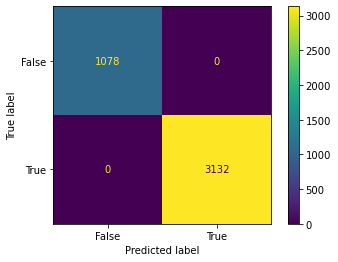

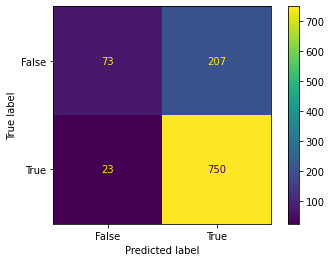

In [22]:
# Takes 1 hour and 6 minutes
random_forest(X_train, X_test, y_train, y_test, cv=5)

### 2f. Bagging Classifier Model

Create a function to use GridSearchCV, find the best hyperparameters and then create a model with those results and values. Also print some scoring metrics to assess how well the model performs.

In [ ]:
def bagged(X_train, X_test, y_train, y_test, cv=5):

    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'base_estimator__max_depth': [2,5,15],
    'base_estimator__criterion': ['gini', 'entropy'],
    'max_samples': [1,2,3],
    'max_features': [1,2,3],
    'n_estimators': [10,50,100]}
    
    # Instantiate & fit Bagging Classifier model for GridSearch
    grid_bag = BaggingClassifier(DecisionTreeClassifier(), random_state=42)
    grid_bag.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_bag, param_grid=grid, cv=5, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    bag_params = gs.best_params_
    
    # Use best max depth from best_params
    bag_max_depth = bag_params['base_estimator__max_depth']
    print(f'Dec Tree Max Depth: {bag_max_depth}')
    
    # Use best max depth from best_params
    bag_criterion = bag_params['base_estimator__criterion']
    print(f'Dec Tree Criterion: {bag_criterion}')
    
    # Use best max samples from best_params
    bag_max_sample = bag_params['max_samples']
    print(f'Bagging Max Samples: {bag_max_sample}')
    
    # Use best max features from best_params
    bag_max_features = bag_params['max_features']
    print(f'Bag Max Features: {bag_max_features}')
    
    # Use best max depth from best_params
    bag_estimators = bag_params['n_estimators']
    print(f'# of Base Estimators: {bag_estimators}')
    
    # Instantiate & fit Bagging Classifier model
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=bag_max_depth,
                                criterion=bag_criterion), max_samples=bag_max_sample,
                                max_features=bag_max_features, n_estimators=bag_estimators,
                                random_state=42)
    bagging.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = bagging.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(bagging, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = bagging.score(X_train, y_train)
    print(f'Train Mean Accuracy Score: {train_score}')
    test_score = bagging.score(X_test, y_test)
    print(f'Test Mean Accuracy Score: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(bagging, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(bagging, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(bagging, X_train, y_train)
    plot_confusion_matrix(bagging, X_test, y_test);

In [ ]:
# Takes about 7-10 minutes to run
bagged(X_train, X_test, y_train, y_test, cv=5)

### 2g. Gradient Booster Classifier Model

In [ ]:
def grad_boost(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2,3,5,10,15],
    'loss': ['deviance', 'exponential'],
    'learning_rate': [.01,.05,.1,.3,.5],
    'n_estimators': [100,500,1000],
    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae']}
    
    # Instantiate & fit Bagging Classifier model for GridSearch
    grad = GradientBoostingClassifier(random_state=42)
    grad.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grad, param_grid=grid, cv=5, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    grad_params = gs.best_params_
    
    # Use best max depth from best_params
    grad_max_depth = grad_params['max_depth']
    print(f'Gradient Boost Max Depth: {grad_max_depth}')
    
    # Use best minimum sample split from best_params
    grad_min_sample = grad_params['min_samples_split']
    print(f'Gradient Boost Min Sample Split: {grad_min_sample}')
    
    # Use best loss from best_params
    grad_loss = grad_params['loss']
    print(f'Gradient Boost Loss: {grad_loss}')
    
    # Use best learning rate from best_params
    grad_learning_rate = grad_params['learning_rate']
    print(f'Gradient Boost Learning Rate: {grad_learning_rate}')
    
    # Use best estimators from best_params
    grad_estimators = grad_params['n_estimators']
    print(f'Gradient Boost Estimators: {grad_estimators}')
    
    # Use best criterion from best_params
    grad_criterion = grad_params['criterion']
    print(f'# of Base Estimators: {grad_criterion}')
    
    # Instantiate & fit Gradient Booster model
    g_boost = GradientBoostingClassifier(max_depth=grad_max_depth, min_samples_split=grad_min_sample,
                                         loss=grad_loss, learning_rate=grad_learning_rate,
                                         n_estimators=grad_estimators, criterion=grad_criterion,
                                         random_state=42)
    g_boost.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = g_boost.predict(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(g_boost, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = g_boost.score(X_train, y_train)
    print(f'Train Mean Accuracy Score: {train_score}')
    test_score = g_boost.score(X_test, y_test)
    print(f'Test Mean Accuracy Score: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(g_boost, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(g_boost, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(g_boost, X_train, y_train)
    plot_confusion_matrix(g_boost, X_test, y_test);

In [ ]:
grad_boost(X_train, X_test, y_train, y_test, cv=5)